In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("tl_br_050.csv")
df2 = pd.read_csv("results_brightness.csv")
df2 = df2[df2.brightness_param == 0.50]
df2["n_examples"] = [0 for i in range(len(df2))]
df2_copy = df2.copy(deep=True)
for i in df["n_examples"]:
    df2["n_examples"] = [i for j in range(len(df2))]
    df2_copy = df2_copy.append(df2)
    
df3 = df2[df2.brightness_param == 0.50]
for i in range(len(df3)):
    df = df.append({"n_examples": 0, "accuracy": df3.iloc[i]["pretrained_acc"]}, ignore_index=True)
df = df.sort_values(by="n_examples")

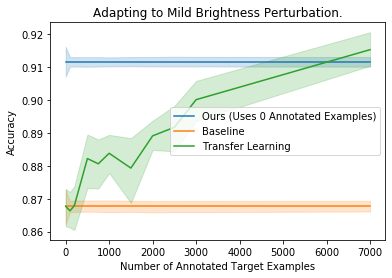

In [83]:
sns.lineplot(x="n_examples", y="tnet_acc", data=df2_copy, label="Ours (Uses 0 Annotated Examples)")
sns.lineplot(x="n_examples", y="pretrained_acc", data=df2_copy, label="Baseline")
ax = sns.lineplot(data=df, x="n_examples", y="accuracy", label="Transfer Learning")
ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Brightness Perturbation.")
plt.savefig("paper_figs/tl_mild_br.pdf")

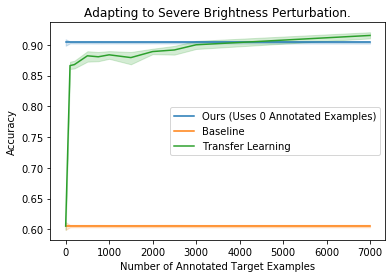

In [84]:
df = pd.read_csv("tl_br_050.csv")
df2 = pd.read_csv("results_brightness.csv")
df2 = df2[df2.brightness_param == 0.25]
df2["n_examples"] = [0 for i in range(len(df2))]
df2_copy = df2.copy(deep=True)
for i in df["n_examples"]:
    df2["n_examples"] = [i for j in range(len(df2))]
    df2_copy = df2_copy.append(df2)
    
df3 = df2[df2.brightness_param == 0.25]
for i in range(len(df3)):
    df = df.append({"n_examples": 0, "accuracy": df3.iloc[i]["pretrained_acc"]}, ignore_index=True)
df = df.sort_values(by="n_examples")


ax = sns.lineplot(x="n_examples", y="tnet_acc", data=df2_copy, label="Ours (Uses 0 Annotated Examples)")
sns.lineplot(x="n_examples", y="pretrained_acc", data=df2_copy, label="Baseline")
sns.lineplot(data=df, x="n_examples", y="accuracy", label="Transfer Learning")
ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Brightness Perturbation.")
plt.savefig("paper_figs/tl_severe_br.pdf")



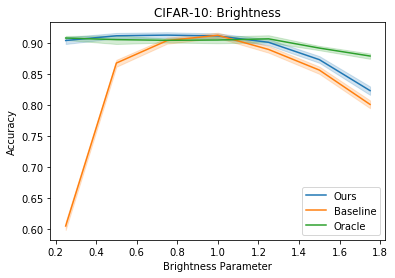

In [85]:
df2 = pd.read_csv("results_brightness.csv")

ax = sns.lineplot(x="brightness_param", y="tnet_acc", data=df2, label="Ours")
sns.lineplot(x="brightness_param", y="pretrained_acc", data=df2, label="Baseline")
sns.lineplot(x="brightness_param", y="oracle_acc", data=df2, label="Oracle")
ax.set(xlabel="Brightness Parameter", ylabel="Accuracy", title="CIFAR-10: Brightness")
plt.savefig("paper_figs/br.pdf")

In [75]:
df2

,tnet_acc,pretrained_acc,oracle_acc,brightness_param
0,0.902,0.615,0.901,0.25
1,0.892,0.596,0.909,0.25
2,0.896,0.599,0.909,0.25
3,0.909,0.595,0.915,0.25
4,0.903,0.607,0.913,0.25
5,0.912,0.613,0.906,0.25
6,0.888,0.591,0.904,0.25
7,0.912,0.616,0.916,0.25
8,0.914,0.599,0.901,0.25
9,0.912,0.622,0.906,0.25
